# Методы Рунге-Кутты

Пусть мы хотим решать задачу следующего вида:
    
У нас есть задача Коши $y' = f(x, y)$ и начальные значения $x_0$, $y_0 = y(x_0)$. При этом мы ищем функцию $y: \mathbb{R} \to \mathbb{R}^n$, удовлетворяющую этому дифференциальному уравнению. У нас $f: \mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n, x_0 \in \mathbb{R}, y_0 \in \mathbb{R}^n$.

Чтобы найти эту фунцию, мы будем искать ее значение в точках с некоторым шагом $h \in \mathbb{R}_{>0}$, то есть в точках $x_i = x_0 + h \cdot i$ для всех $i \in \mathbb{Z}_{\geq 0}$ мы хотим найти $y_i = y(x_i)$.

Первую точку $(x_0, y_0)$ мы знаем. Метод будет итеративный: научимся делать переход от $(x_i, y_i)$ к $(x_{i+1}, y_{i+1})$.

Какой самый простой метод мы можем придумать? Мы можем написать, что: $$y_{i+1} = y(x_{i+1}) = y(x_i + h) = y(x_i) + h y'(x_i) + O(h^2) = y_i + h f(x_i, y_i) + O(h^2)$$ Таким образом, вычислим $y_{i+1} = y_i + h f(x_i, y_i)$. Это дает нам **метод Эйлера**, который может давать довольно большую ошибку.

Для того, чтобы получить более точный метод, надо переходить к $y_{i+1}$ используя значение производной не только в точке $(x_i, y_i)$.

**Явный метод Рунге-Кутты** будет задаваться следующим образом. У метода будет порядок $p \in \mathbb{N}$. Также необходимо будет подобрать некоторые коэфициенты $c_2, c_3, \ldots, c_p$, $a_{2,1}, a_{3,1}, a_{3,2}, \ldots, a_{p,p-1}$, $b_1, b_2, \ldots, b_n$. Коэфициенты $a$ можно записать в такую нижнедиагональную матрицу:

$$
\begin{pmatrix}
\\
a_{2,1} \\
a_{3,1} & a_{3,2} \\
\vdots & \vdots \\
a_{p,1} & a_{p,2} & \ldots & a_{p,p-1} &  \\
\end{pmatrix}
$$

Коэфициенты $b$ должны удовлетворять условиям $b_1 + b_2 + \ldots + b_n = 1$.

Посчитаем итеративно следующие значения:

$$k_1 = f(x_i, y_i)$$

$$k_2 = f(x_i + c_2 h, y_i + k_1 a_{2,1} h)$$

$$k_3 = f(x_i + c_3 h, y_i + k_1 a_{3,1} h + k_2 a_{3,2} h)$$

$$\vdots$$

$$k_p = f(x_i + c_p h, y_i + k_1 a_{p,1} h + k_2 a_{p,2} h + \ldots + k_{p-1} a_{p,p-1} h)$$

То есть, $k_1$ это мы просто берем производную, как в методе Эйлера в точке $(x_i, y_i)$. Значение $k_2$ - мы считаем значение производной, сдвинувшись из $(x_i, y_i)$ на $(c_2, k_1 a_{2,1})h$. Значение $k_3$ - считаем значение производной, сдвинувшись из $(x_i, y_i)$ на $(c_3, k_1 a_{3,1} + k_2 a_{3,2})h$. И так далее. То есть мы считаем значение $p$ производных, сдвигаясь из точки $(x_i, y_i)$ на чуть чуть, каждый раз используя значения предыдущих производных для сдвига.

Тогда, мы используя значения посчитанных производных $k_1, k_2, \ldots, k_p$, вычисляем

$$y_{i+1} = y_i + b_1 k_1 + b_2 k_2 + \ldots + b_p k_p$$

Пока что описанный метод звучит очень абстрактно, то есть мы как-то должны выбрать все эти коэфициенты, чтобы для любой функции $f$ метод давал маленькую ошибку.

Для этого напишем, что мы хотим, чтобы $\phi(h) = \frac{y(x_i + h) - y(x_i)}{h} - \sum\limits_{i=1}^{k}{b_i k_i}$ было мало. Для этого, мы просто хотим, чтобы $$\phi(0) = 0 \\ \phi'(0) = 0 \\ \phi^{(2)}(0) = 0 \\ \vdots \\ \phi^{(m-1)}(0) = 0$$

Тогда из разложения $\phi$ в ряд Тейлора, мы получим, что $\phi(h) = O(h^m)$. Поэтому, умножив на $h$ определение функции $\phi$, мы получим $$y(x_i + h) = y(x_i) + \sum\limits_{i=1}^{k}{b_i k_i} + O(h^{m+1})$$

Число $m$ нужно постараться получить настолько большим, насколько получится. Если написать, что $\phi^{(i)}(0) = 0$, то там получится сумма произведений каких-то алгебраических функций от коэфициентов на производные $f$. Таким образом, нужно, чтобы все эти функции от коэфициентов равнялись $0$. Нужно получить систему алгебраических уравнений и решить ее, взяв максимальное $m$, при котором решить систему получится.

Проделывать эту техническую работу мы не будем, а лучше сразу перейдем к результатам.

## Методы Рунге-Кутты разных порядков

**Метод Рунге-Кутты второго порядка**

Если положить $p = 2$, то одно из решений будет: $c_2 = 1$, $a_{2,1} = 1$, $b_1 = b_2 = \frac{1}{2}$.

То есть:

$$k_1 = f(x_i, y_i)$$

$$k_2 = f(x_i + h, y_i + k_1 h)$$

$$y_{i+1} = y_i + \frac{k_1 + k_2}{2}$$

Ошибка одного перехода будет $O(h^3)$.

**Метод Рунге-Кутты третьего порядка**

Если положить $p = 3$, то одно из решений будет: $c_2 = \frac{1}{2}$, $c_3 = 1$, $a = \begin{pmatrix} \\ \frac{1}{2} \\ -1 & 2 & \end{pmatrix}$, $b_1 = b_3 = \frac{1}{6}$, $b_2 = \frac{2}{3}$.

То есть:

$$k_1 = f(x_i, y_i)$$

$$k_2 = f(x_i + \frac{h}{2}, y_i + \frac{k_1 h}{2})$$

$$k_3 = f(x_i + h, y_i - k_1 h + 2 k_2 h)$$

$$y_{i+1} = y_i + \frac{k_1 + 4 k_2 + k_3}{6}$$

Ошибка одного перехода будет $O(h^4)$.

**Метод Рунге-Кутты четвертого порядка**

Если положить $p = 4$, то одно из решений будет: $c_2 = c_3 = \frac{1}{2}$, $a = \begin{pmatrix} \\ \frac{1}{2} \\ 0 & \frac{1}{2} \\ 0 & 0 & 1 & \end{pmatrix}$, $b_1 = b_4 = \frac{1}{6}$, $b_2 = b_3 = \frac{1}{3}$.

То есть:

$$k_1 = f(x_i, y_i)$$

$$k_2 = f(x_i + \frac{h}{2}, y_i + \frac{k_1 h}{2})$$

$$k_3 = f(x_i + \frac{h}{2}, y_i + \frac{k_2 h}{2})$$

$$k_4 = f(x_i + h, y_i + k_3 h)$$

$$y_{i+1} = y_i + \frac{k_1 + 2 k_2 + 2 k_3 + k_4}{6}$$

Ошибка одного перехода будет $O(h^5)$.

На практике чаще всего используется метод Рунге-Кутты четвертого порядка, потому что он имеет хорошую точность и при этом является эффективным.

Далее рассмотрим разные примеры.

## Примеры

**Пример 1**

Подберем дифференциальное уравнение под конкреткую функцию $y = \arctan{x}$. Построим некоторое дифференциальное уравнение для этой функции. Сделаем его дифференциальным уравнением $2$ порядка, чтобы показать, как сводить дифференциальные уравения более высокого порядка к дифференциальным уравнениям первого порядка, чтобы в итоге применить численные методы.

Как известно, $y' = \frac{1}{1+x^2}$, $y'' = \frac{-2x}{(1+x^2)^2} = \frac{1}{1+x^2}-\frac{(1+x)^2}{(1+x^2)^2}$.

Тогда напишем, что $y'' = \frac{1}{1+x^2}-\frac{(1+x)^2}{(1+x^2)^2} = y' - (1+x)(1+\tan{y})(y')^2$.

Получаем дифференциальное уравнение $y'' = y' - (1+x)(1+\tan{y})(y')^2$. Чтобы получить уравнение Коши, единственное решение которого $y = \arctan{x}$, зададим начальные значения $y(0) = 0$, $y'(0) = 1$.

**Решение примера 1**

$y'' = y' - (1+x)(1+\tan{y})(y')^2$, $y(0) = 0$, $y'(0) = 1$

Для того, чтобы свести решение такого ДУ к методу Рунге-Кутты, сделаем такую замену $z = y'$. Тогда $z' = y''$.

Получаем, что $y' = z$ и $z' = z - (1+x)(1+\tan{y})z^2$. То есть:

$
\begin{pmatrix}
y \\
z
\end{pmatrix}' = 
\begin{pmatrix}
z \\
z - (1+x)(1+\tan{y})z^2
\end{pmatrix}
$ и
$
\begin{pmatrix}
y \\
z
\end{pmatrix}(0) = 
\begin{pmatrix}
0 \\
1
\end{pmatrix}
$

Тогда рассмотрим: $f(x, \begin{pmatrix} y \\ z \end{pmatrix}) = \begin{pmatrix} z \\ z - (1+x)(1+\tan{y})z^2 \end{pmatrix}$ и можем применить метод Рунге-Кутты. Нам при этом будут интересны значения только первой компоненты ($y$).

In [92]:
import os
import pandas as pd
import numpy as np

os.system('g++ -std=c++17 -O2 -o example1 example1.cpp')
code = os.system('./example1')

In [93]:
table = pd.read_csv("report1.csv", sep=",")
table

,x,y,y (p = 1),error (p = 1),y (p = 2),error (p = 2),y (p = 3),error (p = 3),y (p = 4),error (p = 4)
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.2,0.197396,0.200000,0.002604,0.200000,0.002604,0.197195,-0.000200,0.197391,-0.000005
2,0.4,0.380506,0.400000,0.019494,0.383886,0.003379,0.380169,-0.000337,0.380503,-0.000003
3,0.6,0.540420,0.582270,0.041850,0.543022,0.002602,0.540110,-0.000310,0.540414,-0.000006
4,0.8,0.674741,0.734818,0.060077,0.676045,0.001304,0.674569,-0.000172,0.674725,-0.000016
5,1.0,0.785398,0.856127,0.070729,0.785601,0.000203,0.785374,-0.000025,0.785370,-0.000028
6,1.2,0.876058,0.951273,0.075215,0.875575,-0.000483,0.876136,0.000078,0.876022,-0.000036
7,1.4,0.950547,1.026477,0.075930,0.949741,-0.000806,0.950677,0.000130,0.950508,-0.000039
8,1.6,1.012197,1.086832,0.074635,1.011310,-0.000887,1.012344,0.000147,1.012157,-0.000040
9,1.8,1.063698,1.136073,0.072376,1.062867,-0.000831,1.063841,0.000143,1.063660,-0.000038


Для того, чтобы продемонстрировать работу метода специально возьмем немаленький шаг $h = 0.2$ и рассмотрим $y(x)$ на отрезке $[0, 5]$.

Можно увидеть, насколько хорошо работают методы даже с таким немаленьким шагом и что ошибка уменьшается при увеличении $p$.

**Пример 2**

Сделаем дифференциальное уравнение для функции $y(x) = 5 e^{-\frac{x}{10}}\cos{7x} + 3\sin{5x}$ (для того, чтобы получить интересный график). Собственные числа характеристического многочлена: $\lambda_1 = -\frac{1}{10} + 7i$, $\lambda_2 = 5i$ и их сопряженные. Характеристический многочлен должен быть $(\lambda-\lambda_1)(\lambda-\overline{\lambda_1})(\lambda-\lambda_2)(\lambda-\overline{\lambda_2})=\lambda^4+\frac{1}{5}\lambda^3+\frac{7401}{100}\lambda^2+5\lambda+\frac{4901}{4}$.

Получаем дифференциальное уравнение: $y^{(4)}+\frac{1}{5}y^{(3)}+\frac{7401}{100}y^{(2)}+5y'+\frac{4901}{4}y = 0$. Начальные условия: $y(0) = 5$, $y'(0) = \frac{29}{2}$, $y^{(2)}(0) = -\frac{4899}{20}$, $y^{(3)}(0) = -\frac{60301}{200}$.

**Решение примера 2**

Аналогичным способом (как в примере 1) можно свести решение уравнения к уравнению для численного метода размерности $4$.

In [94]:
os.system('g++ -std=c++17 -O2 -o example2 example2.cpp')
code = os.system('./example2')

In [95]:
table = pd.read_csv("report2.csv", sep=",")
table.head(10)

,x,y,y (p = 1),error (p = 1),y (p = 2),error (p = 2),y (p = 3),error (p = 3),y (p = 4),error (p = 4)
0,0.00,5.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000
1,0.05,5.415650,5.725000,0.309350,5.418812,0.003163,5.412531,-0.003119,5.415654,0.000004
2,0.10,5.224436,5.837625,0.613189,5.206297,-0.018139,5.218635,-0.005801,5.224590,0.000154
3,0.15,4.495732,5.300187,0.804455,4.436819,-0.058913,4.488699,-0.007033,4.496148,0.000416
4,0.20,3.357421,4.149937,0.792516,3.248190,-0.109231,3.351312,-0.006109,3.358148,0.000727
5,0.25,1.977728,2.500120,0.522392,1.821536,-0.156193,1.974949,-0.002779,1.978737,0.001008
6,0.30,0.542857,0.531868,-0.010989,0.356404,-0.186453,0.545538,0.002682,0.544035,0.001178
7,0.35,-0.766740,-1.522937,-0.756198,-0.955635,-0.188896,-0.757240,0.009500,-0.765571,0.001169
8,0.40,-1.798494,-3.406561,-1.608067,-1.955475,-0.156980,-1.781972,0.016522,-1.797552,0.000942
9,0.45,-2.445599,-4.865747,-2.420148,-2.535955,-0.090356,-2.423199,0.022400,-2.445102,0.000497


In [96]:
table.tail(10)

,x,y,y (p = 1),error (p = 1),y (p = 2),error (p = 2),y (p = 3),error (p = 3),y (p = 4),error (p = 4)
391,19.55,-0.924406,5.395204e+09,5.395204e+09,-3.258431,-2.334024,-0.892725,0.031681,-0.927101,-0.002695
392,19.60,-1.357609,4.773239e+09,4.773239e+09,-3.803760,-2.446151,-1.334429,0.023181,-1.360324,-0.002714
393,19.65,-1.729883,3.496472e+09,3.496472e+09,-4.093706,-2.363823,-1.713097,0.016786,-1.731779,-0.001896
394,19.70,-2.028290,1.647656e+09,1.647656e+09,-4.082403,-2.054113,-2.012738,0.015552,-2.028707,-0.000417
395,19.75,-2.240318,-6.110535e+08,-6.110535e+08,-3.748487,-1.508168,-2.218861,0.021458,-2.238880,0.001439
396,19.80,-2.353973,-3.049034e+09,-3.049034e+09,-3.099174,-0.745201,-2.318919,0.035054,-2.350652,0.003321
397,19.85,-2.358424,-5.387750e+09,-5.387750e+09,-2.171494,0.186929,-2.303104,0.055320,-2.353559,0.004865
398,19.90,-2.245186,-7.329486e+09,-7.329486e+09,-1.030390,1.214796,-2.165431,0.079755,-2.239443,0.005744
399,19.95,-2.009680,-8.591668e+09,-8.591668e+09,0.236246,2.245926,-1.905000,0.104680,-2.003965,0.005715
400,20.00,-1.652953,-8.943188e+09,-8.943188e+09,1.525154,3.178107,-1.527218,0.125735,-1.648292,0.004661


Мы взяли шаг $h = 0.05$ и рассматриваем $y(x)$ на отрезке $[0, 20]$.

Посмотрим на значения, которые получаются в начале и в конце работы алгоритма. Можно видеть, насколько метод четвертого порядка работает лучше методов меньших порядков:

- метод Эйлера сразу улетает в бесконечность
- метод второго порядка получает ошибку, сопоставимую с самой функцией, что плохо
- метод третьего порядка имеет ошибку примерно $0.1$, что не так плохо
- метод четвертого порядка имеет крайне маленькую ошибку

Нарисуем график функции и график, который построит метод с $p=2$, чтобы посмотреть в каких местах метод ошибается:

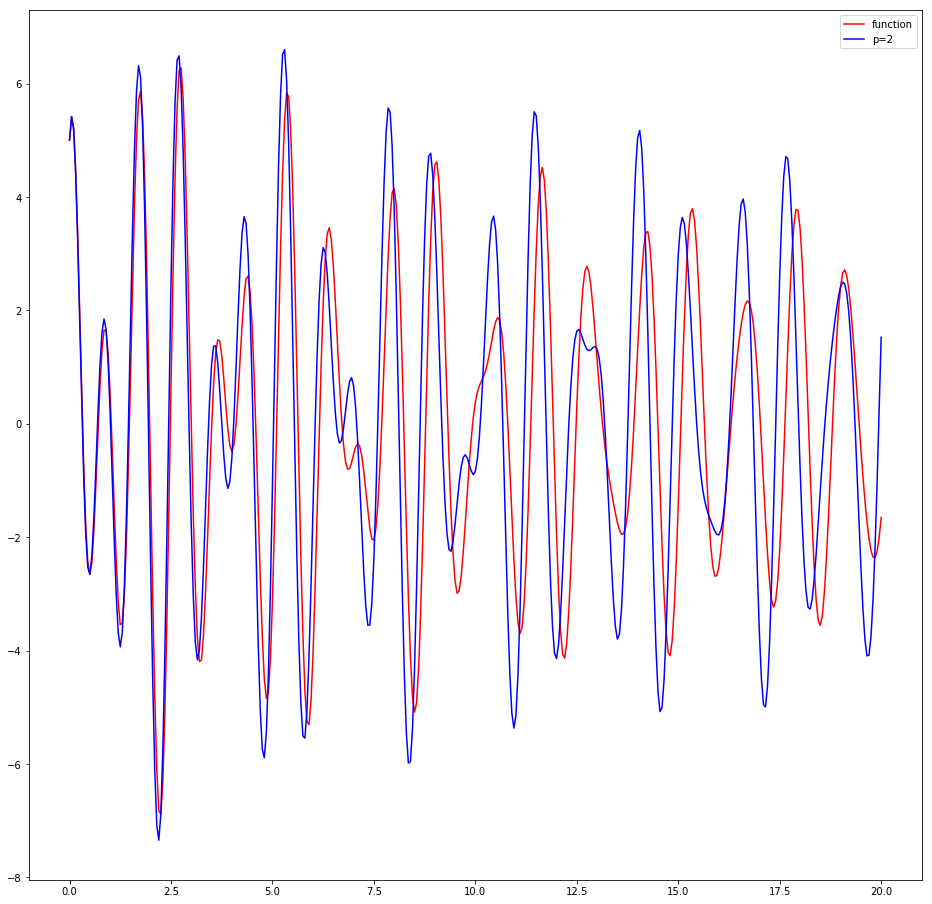

In [97]:
import matplotlib.pyplot as plt

x_coords = np.array(table['x'])
y_coords = np.array(table['y'])
y_2 = np.array(table['y (p = 2)'])
plt.figure(figsize=(16, 16))
plt.plot(x_coords, y_coords, color='red', label='function')
plt.plot(x_coords, y_2, color='blue', label='p=2')
plt.legend()
plt.show()

**Пример 3**

Раз мы изучаем численные методы, давайте придумаем какое-нибудь сложное дифференциальное уравнение, которое мы бы точно не смогли решить руками и решим его методом Рунге-Кутты, а потом посмотрим на график.

Итак, сделаем какое-нибудь страшное уравнение:

$$y' = 5\sin{(x^2 + y)}\cos(y^3 + x^2) + \frac{\log{(2x^2+3)}(x + y)^2}{2} - 2 \frac{e^{-\frac{x}{2}} \sqrt{x^2+y^4}}{1+x^2}$$

Начальное условие сделаем $y(0) = 0$.

**Решение примера 3**

Посмотрим, какие значения получаются методом Рунге-Кутты $4$ порядка и нарисуем график. Мы берем шаг $h = 0.01$, смотрим на функцию на отрезке $[0, 1.5]$.

In [98]:
os.system('g++ -std=c++17 -O2 -o example3 example3.cpp')
code = os.system('./example3')

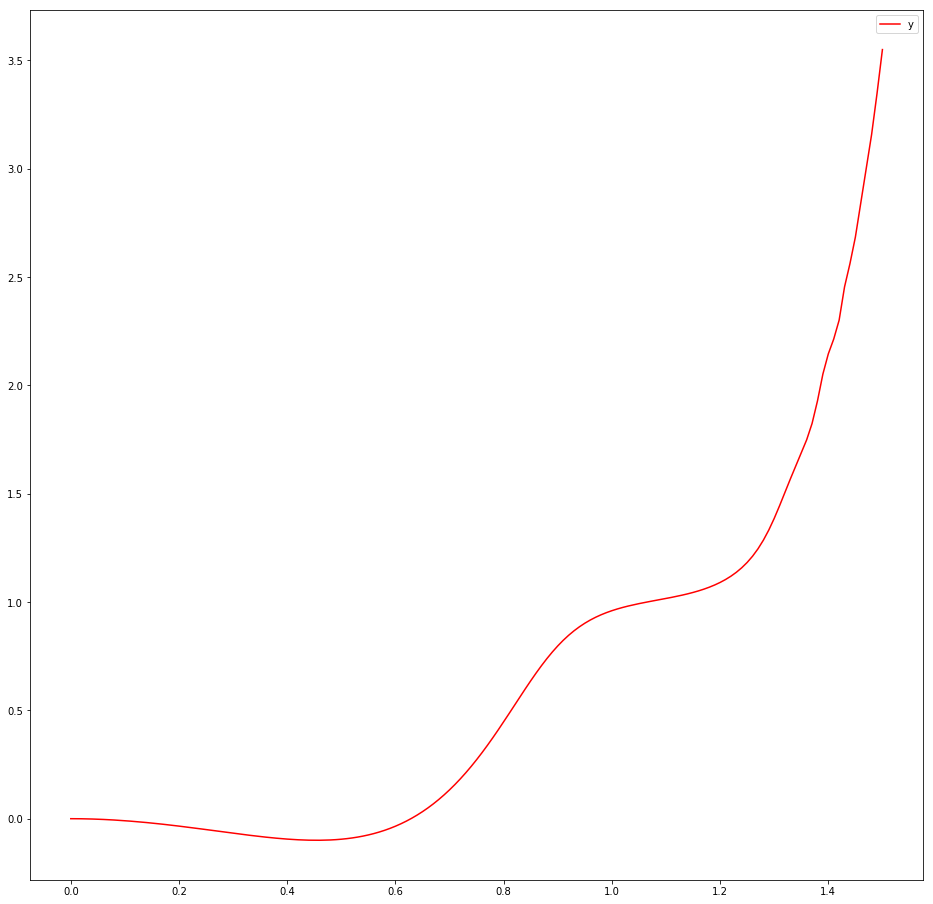

In [99]:
table = pd.read_csv("report3.csv", sep=",")

x_coords = np.array(table['x'])
y_coords = np.array(table['y'])
plt.figure(figsize=(16, 16))
plt.plot(x_coords, y_coords, color='red', label='y')
plt.legend()
plt.show()

Таким образом, мы видим, что мы получили очень мощный, точный и эффективный метод.

Весь проект (вместе с кодом) можно найти тут: https://github.com/isaf27/runge_kutta.